In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train_df = pd.DataFrame(pd.read_csv("./playground-series-s5e3/train.csv"))
shape = train_df.shape
m,n = shape
print("data shape:", shape)
print("*"*100)
print("general overview:")
print(train_df.info())
print("*"*100)
print("Description: ")
train_df.describe()

data shape: (2190, 13)
****************************************************************************************************
general overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None
*********************************

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000



## 🔑 Dictionary

| **Keyword**      | **Meaning**                                                                                     |
|------------------|-------------------------------------------------------------------------------------------------|
| **Pressure**     | The weight of the air above us; influences weather patterns.                                   |
| **Maxtemp**      | The highest temperature recorded during a specific day.                                     |
| **Temperature**   | A measure of how hot or cold the atmosphere is.                                               |
| **Mintemp**      | The lowest temperature recorded during a specific day.                                      |
| **Dew**          | Water vapor that condenses into tiny droplets on surfaces when the temperature drops.         |
| **Dewpoint**     | The temperature at which air becomes saturated with moisture, leading to condensation.         |
| **Humidity**     | The amount of water vapor present in the air.                                                 |
| **Cloud**        | Visible masses of condensed water vapor in the atmosphere.                                     |
| **Sunshine**     | The light and warmth received from the sun; affects temperature and evaporation rates.         |
| **Wind Direction**| The direction from which the wind is blowing; influences weather patterns and moisture movement.|
| **Windspeed**    | The speed at which the wind is blowing; affects moisture distribution in the atmosphere.      |


# 🌧️ Factors Affecting Rainfall

Understanding how various meteorological variables influence rainfall is essential for weather prediction. Brief overview:

| **Column**         | **Effect on Rainfall**                                                                                     |
|--------------------|------------------------------------------------------------------------------------------------------------|
| **🌬️ Pressure**       | Low pressure = stormy weather ☔; high pressure = clear skies ☀️. A drop signals potential rain.         |
| **🌡️ Maxtemp**        | Higher max temps increase evaporation 🌊, raising humidity. Saturated air leads to rain.                  |
| **🌡️ Temperature**    | Warmer air holds more moisture. Cooling can cause condensation, leading to rainfall.                       |
| **🌙 Mintemp**        | Nighttime cooling can create dew 🌫️, contributing to localized rainfall.                                   |
| **💧 Dewpoint**       | Higher dew points mean more moisture. When air cools to this point, condensation occurs, leading to rain.  |
| **💨 Humidity**       | High humidity = saturated air, increasing chances of rain. Low humidity = drier conditions.       |
| **☁️ Cloud**          | Certain clouds (e.g., cumulonimbus) indicate thunderstorms and heavy rain. More clouds = higher rain chances. |
| **☀️ Sunshine**       | More sunshine raises temps and evaporation, but too much can lead to dry conditions.                       |
| **🌪️ Wind Direction** | Winds from the ocean bring moist air 🌊; changes in direction can signal different weather systems.        |
| **💨 Windspeed**      | Strong winds disperse moisture; calm conditions can lead to humidity buildup, increasing rain potential.   |

Understanding these factors helps in predicting rainfall and weather patterns effectively! 🌈


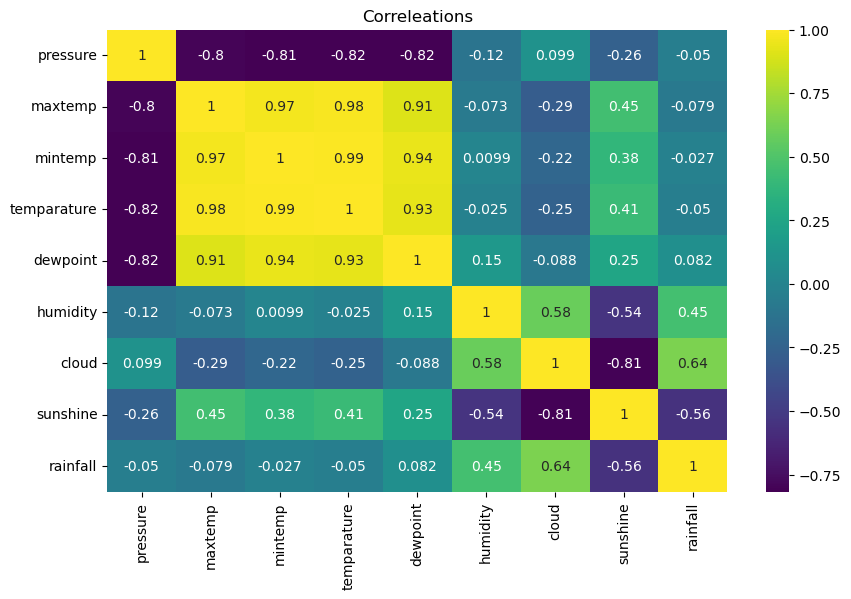

In [54]:
tmp = train_df[["pressure","maxtemp", "mintemp", "temparature", "dewpoint", "humidity", "cloud", "sunshine", "rainfall"]]

corr_matrix = tmp.corr()
plt.figure(figsize=(10, 6))
plt.title("Correleations")
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()


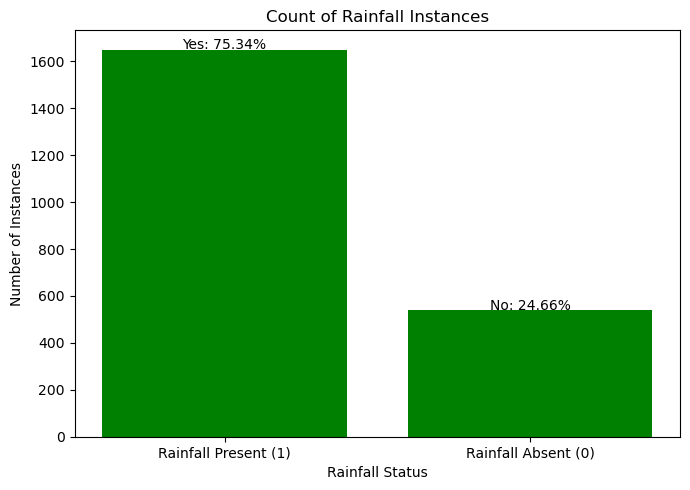

In [65]:
yes_instances = train_df[train_df["rainfall"] == 1]
no_instances = train_df[train_df["rainfall"] == 0]

counts = [len(yes_instances), len(no_instances)]
total = sum(counts)
labels = ['Rainfall Present (1)', 'Rainfall Absent (0)']

plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color="green")

plt.title("Count of Rainfall Instances")
plt.xlabel("Rainfall Status")
plt.ylabel("Number of Instances")

yes_proportion = counts[0] / total
no_proportion = counts[1] / total

plt.text(0, counts[0] + 1, f'Yes: {yes_proportion:.2%}', ha='center', color='black')
plt.text(1, counts[1] + 1, f'No: {no_proportion:.2%}', ha='center', color='black')
plt.tight_layout()
plt.show()